In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# An advantage of importing like this is that you can use the function
# . name instead of writing out the full path every time you use the function
# eg: LogisticRegression()
# .   vs
# .   sklearn.linear_model.LogisticRegression()

# Logistic regression model
from sklearn.linear_model import LogisticRegression
# A function to split data into a train and test set
from sklearn.model_selection import train_test_split
# function to calculcate the accuracy of your model
from sklearn.metrics import accuracy_score
# function for plotting the roc_curve and calculating the area under the curve
from sklearn.metrics import roc_curve, auc
# function for caluculating the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:

# FROM SKLEARN DOCS: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

# THIS FUNCTION DOES NOT WORK WELL WITH ONLY 2 CLASSES

# This plots a pretty confusion matrix
# the confusions matrix function returns a 2d numpy array

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print(cm.shape)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(-0.5, cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


# Load the Data

In [8]:
# load the features dataframe which was created in notebook 2
df = pd.read_csv('../data/features/ALL_AML_features_50.csv', index_col='Accession')
# scikit learn needs each row to represent a sample
# for this reason we need to transpose the dataframe
df = df.transpose()
# Add an extra column to the dataframe containing the sample types
df['type_code'] = 1
for i, row in df.iterrows():
    if i[:3] == "AML":
        df.at[i,'type_code'] = 0


In [9]:
# load the features dataframe which was created in notebook 2
tdf = pd.read_csv('../data/features/Leuk_ALL_AML_test_features_50.csv', index_col='Accession')
# scikit learn needs each row to represent a sample
# for this reason we need to transpose the dataframe
tdf = tdf.transpose()
# Add an extra column to the dataframe containing the sample types
tdf['type_code'] = 1
for i, row in tdf.iterrows():
    if i[:3] == "AML":
        tdf.at[i,'type_code'] = 0

# Using logistic regression to train data

In [10]:
# The features should only contain expression values, not the labels
# This should be a 2d matrix
X_train = df.drop(columns=['type_code']).values
# The labels should not contain any expression values
# This should be a 1d Array/Vector
y_train = df['type_code'].values
y_train.reshape(-1, 1)

X_test = tdf.drop(columns=['type_code']).values
y_test = tdf['type_code'].values
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38, 50)
(35, 50)
(38,)
(35,)


In [11]:
# create a new logistic regression model
# There are many different solvers: 
# .  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#   They all have their strenghts/weaknesses
lr = LogisticRegression(random_state=0, solver='lbfgs')
# train the model using the training data
clf = lr.fit(X_train, y_train)
# now that the model has been trained, predict the classes in the test set
pred = clf.predict(X_test)
# predict outputs labels, decision_function outputs the confidence scores
y_scores = clf.decision_function(X_test)
# print the accuracy sum(predicted == actual) / len(labels)
accuracy = accuracy_score(y_test, pred)

# cross validation
scores = cross_val_score(lr, X_train, y_train, cv=5)
scores 

array([0.88888889, 1.        , 1.        , 1.        , 1.        ])

Confusion matrix, without normalization
[[13  1]
 [ 0 21]]
(2, 2)


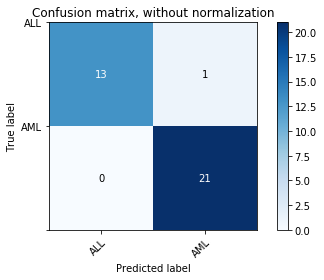

In [12]:
_ = plot_confusion_matrix(y_test, pred, ['ALL', 'AML'])

# Change number of features.

In [15]:
class ModelResult:
    y_scores = ''
    accuracy = ''
    cv_scores = ''

def predictive_modeling(file,file2):
    model_result = ModelResult()
    # load the features dataframe which was created in notebook 2
    df = pd.read_csv(file, index_col='Accession')
    # scikit learn needs each row to represent a sample
    # for this reason we need to transpose the dataframe
    df = df.transpose()
    # Add an extra column to the dataframe containing the sample types
    df['type_code'] = 1
    for i, row in df.iterrows():
        if i[:3] == "AML":
            df.at[i,'type_code'] = 0
    # load the features dataframe which was created in notebook 2
    tdf = pd.read_csv(file2, index_col='Accession')
    # scikit learn needs each row to represent a sample
    # for this reason we need to transpose the dataframe
    tdf = tdf.transpose()
    # Add an extra column to the dataframe containing the sample types
    tdf['type_code'] = 1
    for i, row in tdf.iterrows():
        if i[:3] == "AML":
            tdf.at[i,'type_code'] = 0
    # The features should only contain expression values, not the labels
    # This should be a 2d matrix
    # The features should only contain expression values, not the labels
    # This should be a 2d matrix
    X_train = df.drop(columns=['type_code']).values
    # The labels should not contain any expression values
    # This should be a 1d Array/Vector
    y_train = df['type_code'].values
    y_train.reshape(-1, 1)

    X_test = tdf.drop(columns=['type_code']).values
    y_test = tdf['type_code'].values
    # create a new logistic regression model
    # There are many different solvers: 
    # .  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    #   They all have their strenghts/weaknesses
    lr = LogisticRegression(random_state=0, solver='lbfgs')
    # train the model using the training data
    clf = lr.fit(X_train, y_train)
    # now that the model has been trained, predict the classes in the test set
    pred = clf.predict(X_test)
    # predict outputs labels, decision_function outputs the confidence scores
    model_result.y_scores = clf.decision_function(X_test)
    # print the accuracy sum(predicted == actual) / len(labels)
    model_result.accuracy = accuracy_score(y_test, pred)

    # cross validation 5 folds 
    model_result.cv_scores = cross_val_score(lr, X_train, y_train, cv = 5)
    
    # confusions matrix function
    _ = plot_confusion_matrix(y_test, pred, ['ALL', 'AML'])
    return model_result

Confusion matrix, without normalization
[[ 8  6]
 [ 0 21]]
(2, 2)

 accuracy: 0.8285714285714286

 cv_scores(5 folds): [1.         1.         0.85714286 0.85714286 1.        ]


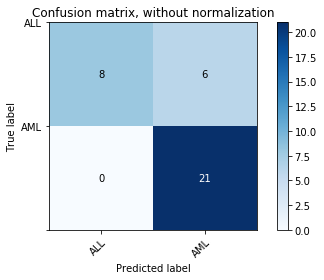

In [23]:
result_2 = predictive_modeling('../data/features/ALL_AML_features_2.csv','../data/features/Leuk_ALL_AML_test_features_2.csv')
#print ('\n y_scores: ' + str(result_2.y_scores))
print ('\n accuracy: ' + str(result_2.accuracy))
print ('\n cv_scores(5 folds): ' + str(result_2.cv_scores))

Confusion matrix, without normalization
[[13  1]
 [ 0 21]]
(2, 2)

 y_scores: [ 55.99803626  60.85394163   9.58424054  44.40769775  21.74871399
  87.68438677  56.75947825  54.28396351  34.92324713  80.96588427
  57.83078234  51.08627643  29.77745468  15.90883889  32.34818064
  61.63061444  68.92379131   2.37700569  20.46616318  25.73886815
  57.98389776  -1.94928579 -26.75855787 -20.07864927 -34.13976969
 -18.00899534  -7.879557   -22.17928113  -3.49587717 -15.02564326
 -17.71346974   7.16785796 -31.0800424  -32.83433179 -24.4115117 ]

 accuracy: 0.9714285714285714

 cv_scores(5 folds): [1. 1. 1. 1. 1.]


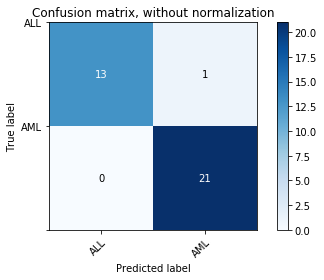

In [22]:
result_2 = predictive_modeling('../data/features/ALL_AML_features_10.csv','../data/features/Leuk_ALL_AML_test_features_10.csv')
print ('\n y_scores: ' + str(result_2.y_scores))
print ('\n accuracy: ' + str(result_2.accuracy))
print ('\n cv_scores(5 folds): ' + str(result_2.cv_scores))


Confusion matrix, without normalization
[[13  1]
 [ 0 21]]
(2, 2)

 y_scores: [ 68.34093996  71.8124465    9.97263279  48.42991826  25.30401131
  94.15108342  64.52041283  57.655547    35.23117128  92.05061665
  61.4379926   54.68421479  35.0447249   20.29230746  36.82775522
  72.25617026  73.56587703   2.87871014  23.8060961   31.27893164
  56.69396495  -4.08222273 -31.89799652 -20.03936413 -29.41399094
 -13.06629676 -10.17433546 -16.12255869  -6.77657251  -8.77757439
 -14.88593993   6.409811   -23.85408209 -29.50634979 -15.83906448]

 accuracy: 0.9714285714285714

 cv_scores(5 folds): [1. 1. 1. 1. 1.]


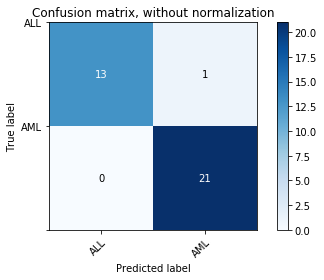

In [21]:
result_20 = predictive_modeling('../data/features/ALL_AML_features_20.csv','../data/features/Leuk_ALL_AML_test_features_20.csv')
print ('\n y_scores: ' + str(result_20.y_scores))
print ('\n accuracy: ' + str(result_20.accuracy))
print ('\n cv_scores(5 folds): ' + str(result_20.cv_scores))

Confusion matrix, without normalization
[[13  1]
 [ 0 21]]
(2, 2)

 y_scores: [ 33.0798411   40.66792137   6.91136587  18.72533229  14.14406642
  52.57016926  36.95727798  28.76281053  14.54710315  44.13289515
  38.93933402  31.00691272  24.85963203  20.57681754  25.54981352
  36.7987323   41.16033089   5.25331316   8.58858223  24.10587815
  24.4388486  -34.22974726 -36.57382613 -35.57966156 -34.31228653
 -43.8295278  -26.23660319 -22.14055193 -23.23571427  -4.95455466
 -13.48736753   2.04955939 -31.18627282 -55.58337558 -25.27330766]

 accuracy: 0.9714285714285714

 cv_scores(5 folds): [0.88888889 1.         1.         1.         1.        ]


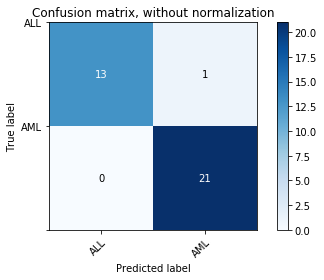

In [20]:
result_100 = predictive_modeling('../data/features/ALL_AML_features_100.csv','../data/features/Leuk_ALL_AML_test_features_100.csv')
print ('\n y_scores: ' + str(result_100.y_scores))
print ('\n accuracy: ' + str(result_100.accuracy))
print ('\n cv_scores(5 folds): ' + str(result_100.cv_scores))